In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer

# Load data

In [2]:
import pandas as pd
df = pd.read_csv('../../dataset_files/drug_dataset.csv')
df = pd.DataFrame(df)
df['title']

0                       Why is this medication prescribed?
1                        How should this medicine be used?
2                             Other uses for this medicine
3                What special precautions should I follow?
4        What special dietary instructions should I fol...
                               ...                        
17738                What other information should I know?
17739                                          Brand names
17740                        In case of emergency/overdose
17741                What other information should I know?
17742                                          Brand names
Name: title, Length: 17743, dtype: object

# Take unique titles

In [3]:
titles = set(df['title'].str.lower())
sentences = list(titles)
len(sentences)

136

# Randomly choose 30 samples of a data

In [4]:
test_cases = random.sample(range(0, len(sentences) - 1), 30)

In [5]:
model = SentenceTransformer('paraphrase-mpnet-base-v2')

In [6]:
sentence_embeddings = model.encode(sentences)

In [7]:
# sentence_embeddings[0]
sentence_embeddings.shape

(136, 768)

# Without dimensionality reduction

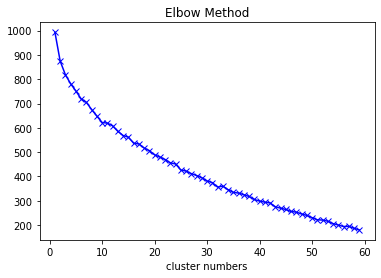

In [8]:
SSE = []

for k in range(1, 60):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(sentence_embeddings)
    SSE.append(kmeans.inertia_)
    
plt.plot(range(1, 60), SSE, 'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

In [11]:
# Hyperparameter 1
n_clusters = 10

km = KMeans(n_clusters=n_clusters)

km.fit(sentence_embeddings)
centers = km.cluster_centers_.argsort()[:,::-1]

print("Len of Labels: ",
       len(set(km.labels_)), 
       " Params: ", 
       km.get_params())

Len of Labels:  10  Params:  {'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 10, 'n_init': 10, 'n_jobs': 'deprecated', 'precompute_distances': 'deprecated', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [12]:
for i in test_cases:
    print(sentences[i], km.predict(sentence_embeddings[i].reshape(-1, 1).T))

rotavirus vaccine [0]
what if there is a serious problem? [8]
who should get this hpv vaccine and when? [4]
some babies should not get this vaccine [4]
notice: [9]
what are the benefits of the moderna covid-19 vaccine? [6]
will the pfizer-biontech covid-19 vaccine give me covid-19? [6]
what is td vaccine? [0]
other uses for this medicine [7]
what is hib vaccine? [0]
other names [3]
where will my vaccination information be recorded? [0]
what are the benefits of the janssen (johnson and johnson) vaccine? [2]
mmr vaccine [0]
what are the risks from this vaccine? [2]
important warning:  [9]
how is the janssen (johnson and johnson) covid-19 vaccine given? [6]
what should you tell the person who is giving the vaccine? [4]
how is the pfizer-biontech covid-19 vaccine given? [6]
the national vaccine injury compensation program [2]
injury compensation [5]
what are the risks from typhoid vaccine? [2]
what is anthrax vaccine? [0]
cholera vaccine [2]
related topics [3]
who should not get ipv or sho

# Using combinition of dimensionality reduction and clustering

## Credit:
    - https://stats.stackexchange.com/a/256173/276359
    - https://stats.stackexchange.com/a/99191/276359

# With PCA 

In [13]:
# Hyperparameter 1 
n_dimention = 10
pca = PCA(n_components=n_dimention)
reduced_data = pca.fit_transform(sentence_embeddings)

In [14]:
reduced_data.shape

(136, 10)

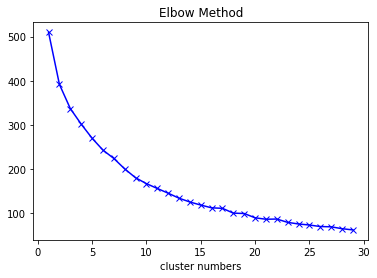

In [15]:
SSE = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(reduced_data)
    SSE.append(kmeans.inertia_)
    
plt.plot(range(1, 30), SSE, 'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

In [19]:
# Hyperparameter 2
n_clusters = 7

km = KMeans(n_clusters=n_clusters)

km.fit(reduced_data)
centers = km.cluster_centers_.argsort()[:,::-1]

print("Len of Labels: ",
       len(set(km.labels_)), 
       " Params: ", 
       km.get_params())

Len of Labels:  7  Params:  {'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 7, 'n_init': 10, 'n_jobs': 'deprecated', 'precompute_distances': 'deprecated', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [20]:
len(centers[0])

10

In [21]:
for i in test_cases:
    print(sentences[i], km.predict(reduced_data[i].reshape(-1, 1).T))

rotavirus vaccine [0]
what if there is a serious problem? [3]
who should get this hpv vaccine and when? [4]
some babies should not get this vaccine [4]
notice: [2]
what are the benefits of the moderna covid-19 vaccine? [1]
will the pfizer-biontech covid-19 vaccine give me covid-19? [1]
what is td vaccine? [0]
other uses for this medicine [6]
what is hib vaccine? [0]
other names [5]
where will my vaccination information be recorded? [0]
what are the benefits of the janssen (johnson and johnson) vaccine? [1]
mmr vaccine [0]
what are the risks from this vaccine? [1]
important warning:  [2]
how is the janssen (johnson and johnson) covid-19 vaccine given? [1]
what should you tell the person who is giving the vaccine? [4]
how is the pfizer-biontech covid-19 vaccine given? [1]
the national vaccine injury compensation program [1]
injury compensation [3]
what are the risks from typhoid vaccine? [1]
what is anthrax vaccine? [0]
cholera vaccine [0]
related topics [5]
who should not get ipv or sho

# With T-SNE (method = exact)

In [24]:
# Hyperparameter 1 
n_dimention = 10
tsne = TSNE(n_components=n_dimention, method='exact')
reduced_data = tsne.fit_transform(sentence_embeddings)

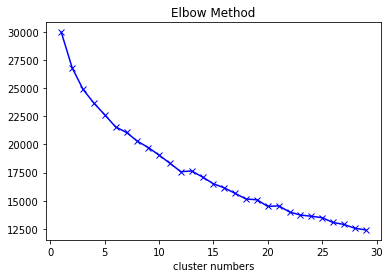

In [25]:
SSE = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(reduced_data)
    SSE.append(kmeans.inertia_)
    
plt.plot(range(1, 30), SSE, 'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

In [28]:
# Hyperparameter 2
n_clusters = 7

km = KMeans(n_clusters=n_clusters)

km.fit(reduced_data)
centers = km.cluster_centers_.argsort()[:,::-1]

print("Len of Labels: ",
       len(set(km.labels_)), 
       " Params: ", 
       km.get_params())

Len of Labels:  7  Params:  {'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 7, 'n_init': 10, 'n_jobs': 'deprecated', 'precompute_distances': 'deprecated', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [29]:
for i in test_cases:
    print(sentences[i], km.predict(reduced_data[i].reshape(-1, 1).T))

rotavirus vaccine [4]
what if there is a serious problem? [4]
who should get this hpv vaccine and when? [4]
some babies should not get this vaccine [1]
notice: [3]
what are the benefits of the moderna covid-19 vaccine? [4]
will the pfizer-biontech covid-19 vaccine give me covid-19? [1]
what is td vaccine? [6]
other uses for this medicine [1]
what is hib vaccine? [2]
other names [2]
where will my vaccination information be recorded? [2]
what are the benefits of the janssen (johnson and johnson) vaccine? [0]
mmr vaccine [6]
what are the risks from this vaccine? [3]
important warning:  [0]
how is the janssen (johnson and johnson) covid-19 vaccine given? [0]
what should you tell the person who is giving the vaccine? [3]
how is the pfizer-biontech covid-19 vaccine given? [1]
the national vaccine injury compensation program [6]
injury compensation [1]
what are the risks from typhoid vaccine? [6]
what is anthrax vaccine? [1]
cholera vaccine [6]
related topics [3]
who should not get ipv or sho

# With T-SNE (method = barnes_hut)

In [30]:
# Hyperparameter 1 
# Barnes–Hut method works only with less than 4 dimensions
n_dimention = 3
tsne = TSNE(n_components=n_dimention, method='barnes_hut')
reduced_data = tsne.fit_transform(sentence_embeddings)

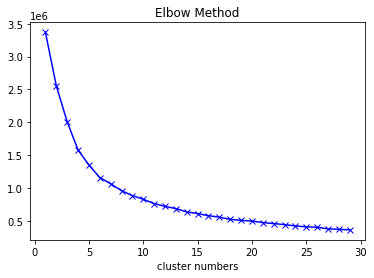

In [31]:
SSE = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(reduced_data)
    SSE.append(kmeans.inertia_)
    
plt.plot(range(1, 30), SSE, 'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

In [32]:
# Hyperparameter 2
n_clusters = 5

km = KMeans(n_clusters=n_clusters)

km.fit(reduced_data)
centers = km.cluster_centers_.argsort()[:,::-1]

print("Len of Labels: ",
       len(set(km.labels_)), 
       " Params: ", 
       km.get_params())

Len of Labels:  5  Params:  {'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 5, 'n_init': 10, 'n_jobs': 'deprecated', 'precompute_distances': 'deprecated', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [33]:
for i in test_cases:
    print(sentences[i], km.predict(reduced_data[i].reshape(-1, 1).T))

rotavirus vaccine [1]
what if there is a serious problem? [1]
who should get this hpv vaccine and when? [3]
some babies should not get this vaccine [2]
notice: [0]
what are the benefits of the moderna covid-19 vaccine? [3]
will the pfizer-biontech covid-19 vaccine give me covid-19? [3]
what is td vaccine? [2]
other uses for this medicine [4]
what is hib vaccine? [3]
other names [4]
where will my vaccination information be recorded? [4]
what are the benefits of the janssen (johnson and johnson) vaccine? [3]
mmr vaccine [1]
what are the risks from this vaccine? [4]
important warning:  [0]
how is the janssen (johnson and johnson) covid-19 vaccine given? [2]
what should you tell the person who is giving the vaccine? [1]
how is the pfizer-biontech covid-19 vaccine given? [3]
the national vaccine injury compensation program [4]
injury compensation [4]
what are the risks from typhoid vaccine? [0]
what is anthrax vaccine? [1]
cholera vaccine [1]
related topics [0]
who should not get ipv or sho